In [1]:
# ─────────────────────────────────────────────
# 0 : Loading
# ─────────────────────────────────────────────

%load_ext autoreload
%autoreload 2

In [2]:
# ─────────────────────────────────────────────
# 1.1 : Python Version
# ─────────────────────────────────────────────

import sys, site
print("Python:", sys.executable)
print("User site:", site.getusersitepackages())
print("Site-packages:", site.getsitepackages() if hasattr(site, "getsitepackages") else "n/a")


# ─────────────────────────────────────────────
# 1.2 : Librairies
# ─────────────────────────────────────────────

import numpy as np
import polars as pl

from pathlib import Path
from matplotlib import pyplot as plt

from ncl.reading import getting_main_file_with_verifications

Python: /home/nicolas/Documents/PhD/Workspace/.venv/bin/python
User site: /home/nicolas/.local/lib/python3.12/site-packages
Site-packages: ['/home/nicolas/Documents/PhD/Workspace/.venv/lib/python3.12/site-packages', '/home/nicolas/Documents/PhD/Workspace/.venv/local/lib/python3.12/dist-packages', '/home/nicolas/Documents/PhD/Workspace/.venv/lib/python3/dist-packages', '/home/nicolas/Documents/PhD/Workspace/.venv/lib/python3.12/dist-packages']


In [13]:
# ─────────────────────────────────────────────
# 2.1 : Functions
# ─────────────────────────────────────────────

# Datas

def ordering_df(df: pl.DataFrame) -> pl.DataFrame:
    df_sorted = df.sort(
        by=["s", "alpha_choice", "bpmin", "l"] ,
        descending=[False, False, False, False]
    )
    return df_sorted

def data_one_scen(df: pl.DataFrame, scen: dict) -> pl.DataFrame:
    return df.filter(
        (pl.col("alpha_choice") == scen["alpha_choice"])
        & (pl.col("s") == scen["s"])
        & (pl.col("l") == scen["l"])
        & (pl.col("bpmin") == scen["bpmin"])
    )


# Cuts 

def cut_1_mu(df: pl.DataFrame, scen: dict, mu: int) -> pl.DataFrame:
    return df.filter(
        (pl.col("alpha_choice") == scen["alpha_choice"])
        & (pl.col("s") == scen["s"])
        & (pl.col("l") == scen["l"])
        & (pl.col("bpmin") == scen["bpmin"])
        & (pl.col("mu") == mu)
    )
    
def cut_1_theta(df: pl.DataFrame, scen: dict, theta: int) -> pl.DataFrame:
    return df.filter(
        (pl.col("alpha_choice") == scen["alpha_choice"])
        & (pl.col("s") == scen["s"])
        & (pl.col("l") == scen["l"])
        & (pl.col("bpmin") == scen["bpmin"])
        & (pl.col("theta") == theta)
    )


# ─────────────────────────────────────────────
# 2.2 : Getting datas
# ─────────────────────────────────────────────

# Root
root = Path.home() / "Documents" / "PhD" / "Workspace" / "nucleo" / "outputs" / "2025-01-01_PSMN"

# Reading 
path_datas = root / "ncl_output.parquet"
df_raw = pl.read_parquet(path_datas)

# Loading + Filtering
df_main = getting_main_file_with_verifications(df_raw)

# Ordering
df_data = ordering_df(df_main)


# ─────────────────────────────────────────────
# 2.3 : Reading Scenarios
# ─────────────────────────────────────────────

# Reading
path_scenario = root / "scenarios.json"
all_scenarios = pl.read_json(path_scenario)

# Ordering
df_scenarios = ordering_df(all_scenarios)


# ─────────────────────────────────────────────
# 2.4 : Prints
# ─────────────────────────────────────────────

# print("All scenarios:\n", df_scen)

df_scen_nucleo = df_scenarios[0, 2, 12]
print("Nucleo scenarios:\n", df_scen_nucleo)

df_scen_linker = df_scenarios[1:9]
print("Linker scenarios:\n", df_scen_linker)

df_scen_bpmin = df_scenarios[9:12]
print("Bpmin scenarios:\n", df_scen_bpmin)

Nucleo scenarios:
 shape: (3, 4)
┌─────┬─────┬───────┬───────────────┐
│ s   ┆ l   ┆ bpmin ┆ alpha_choice  │
│ --- ┆ --- ┆ ---   ┆ ---           │
│ i64 ┆ i64 ┆ i64   ┆ str           │
╞═════╪═════╪═══════╪═══════════════╡
│ 150 ┆ 10  ┆ 0     ┆ constant_mean │
│ 150 ┆ 10  ┆ 0     ┆ nt_random     │
│ 150 ┆ 10  ┆ 0     ┆ periodic      │
└─────┴─────┴───────┴───────────────┘
Linker scenarios:
 shape: (8, 4)
┌─────┬─────┬───────┬──────────────┐
│ s   ┆ l   ┆ bpmin ┆ alpha_choice │
│ --- ┆ --- ┆ ---   ┆ ---          │
│ i64 ┆ i64 ┆ i64   ┆ str          │
╞═════╪═════╪═══════╪══════════════╡
│ 150 ┆ 5   ┆ 0     ┆ nt_random    │
│ 150 ┆ 10  ┆ 0     ┆ nt_random    │
│ 150 ┆ 15  ┆ 0     ┆ nt_random    │
│ 150 ┆ 20  ┆ 0     ┆ nt_random    │
│ 150 ┆ 25  ┆ 0     ┆ nt_random    │
│ 150 ┆ 50  ┆ 0     ┆ nt_random    │
│ 150 ┆ 100 ┆ 0     ┆ nt_random    │
│ 150 ┆ 150 ┆ 0     ┆ nt_random    │
└─────┴─────┴───────┴──────────────┘
Bpmin scenarios:
 shape: (3, 4)
┌─────┬─────┬───────┬──────────────┐
│ s  

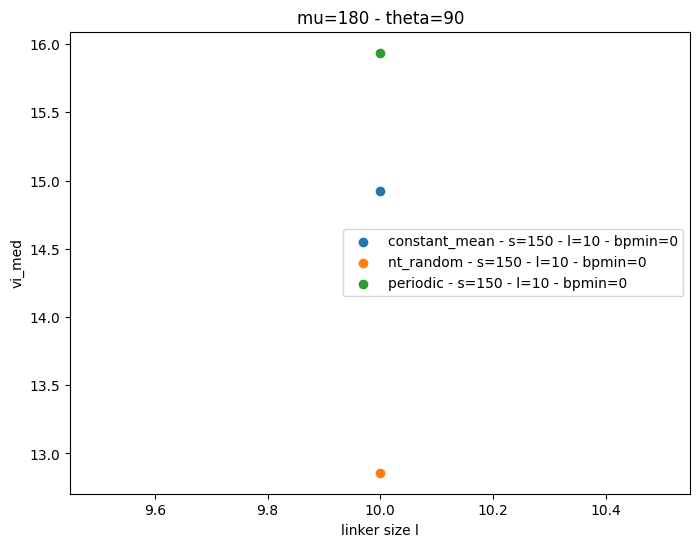

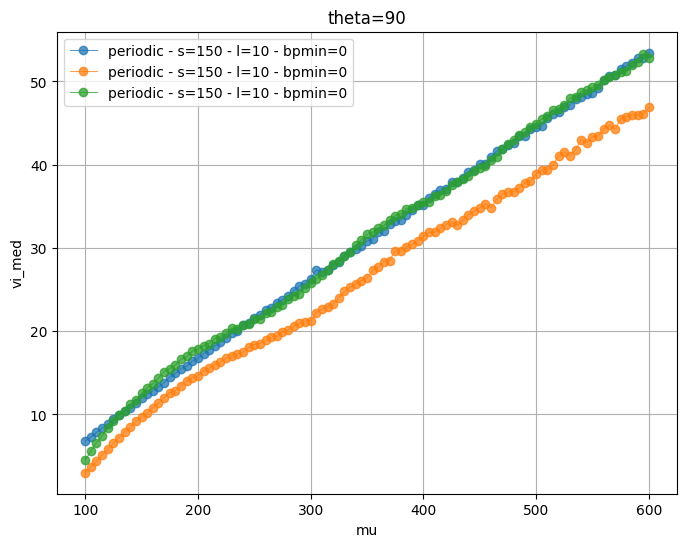

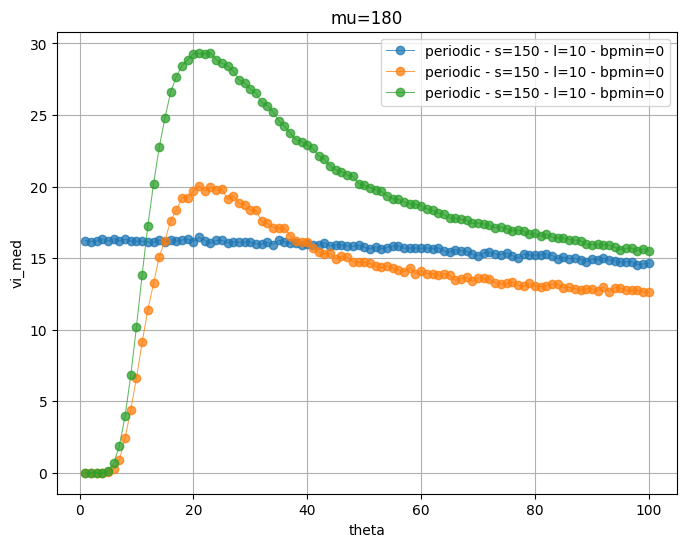

In [ ]:
# ─────────────────────────────────────────────
# 3.0 : Cuts Of Hetmaps - (µ,θ) Values
# ─────────────────────────────────────────────

df_scen = df_scen_nucleo
mu      = 180
theta   = 90


# ─────────────────────────────────────────────
# 3.1 : Plot - One Proba (µ,θ) - Every Scenario
# ─────────────────────────────────────────────

plt.figure(figsize=(8,6))
plt.title(f"mu={mu} - theta={theta}")

for scen in df_scen.iter_rows(named=True):
    
    # DataFrame
    df = data_one_scen(df_data, scen)
    df_proba = df.filter((pl.col("mu") == mu) & (pl.col("theta") == theta))
    
    # Scenario parameters
    alpha_choice = df_proba["alpha_choice"].to_numpy()[0]
    s = df_proba["s"].to_numpy()[0]
    l = df_proba["l"].to_numpy()[0]
    bpmin = df_proba["bpmin"].to_numpy()[0]
    
    # Data
    vi_med = df_proba["vi_med"].to_numpy()[0]
    plt.scatter(l, vi_med, label=f"{alpha_choice} - s={s} - l={l} - bpmin={bpmin}")

# Plot
plt.xlabel("linker size l")
plt.ylabel("vi_med")
plt.legend()
plt.grid(True)
plt.show()


# ─────────────────────────────────────────────
# 3.2 : Plot - Few Probas via 1θ - Few Scenario
# ─────────────────────────────────────────────

plt.figure(figsize=(8,6))
plt.title(f"theta={theta}")

for scen in df_scen.iter_rows(named=True):
    
    # DataFrame
    df_1_theta = cut_1_theta(df_data, scen, theta)
    df_1_theta_sorted = df_1_theta.sort(
            by="mu" , descending=False
    )
    
    # Scenario parameters
    alpha_choice = df_proba["alpha_choice"].to_numpy()[0]
    s = df_proba["s"].to_numpy()[0]
    l = df_proba["l"].to_numpy()[0]
    bpmin = df_proba["bpmin"].to_numpy()[0]
    
    # Data
    vi_med = df_proba["vi_med"].to_numpy()[0]
    plt.plot(
        df_1_theta_sorted["mu"], df_1_theta_sorted["vi_med"],
        label=f"{alpha_choice} - s={s} - l={l} - bpmin={bpmin}",
        marker="o", lw=0.75, alpha=0.75
    )

# Plot
plt.xlabel("mu")
plt.ylabel("vi_med")
plt.legend()
plt.grid(True)
plt.show()


# ─────────────────────────────────────────────
# 3.3 : Plot - Few Probas via 1µ - Few Scenario
# ─────────────────────────────────────────────

plt.figure(figsize=(8,6))
plt.title(f"mu={mu}")

for scen in df_scen.iter_rows(named=True):
    
    # DataFrame
    df_1_mu = cut_1_mu(df_data, scen, mu)
    df_1_mu_sorted = df_1_mu.sort(
            by="theta" , descending=False
    )
    
    # Scenario parameters
    alpha_choice = df_proba["alpha_choice"].to_numpy()[0]
    s = df_proba["s"].to_numpy()[0]
    l = df_proba["l"].to_numpy()[0]
    bpmin = df_proba["bpmin"].to_numpy()[0]
    
    # Data
    vi_med = df_proba["vi_med"].to_numpy()[0]
    plt.plot(
        df_1_mu_sorted["theta"], df_1_mu_sorted["vi_med"],
        label=f"{alpha_choice} - s={s} - l={l} - bpmin={bpmin}",
        marker="o", lw=0.75, alpha=0.75
    )
    
# Plot
plt.xlabel("theta")
plt.ylabel("vi_med")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ─────────────────────────────────────────────
# 4.1 : Focused On Linker Size
# ─────────────────────────────────────────────







shape: (80_800, 27)
┌──────────────┬─────┬─────┬───────┬───┬────────┬─────────────┬───────────┬───────┐
│ alpha_choice ┆ s   ┆ l   ┆ bpmin ┆ … ┆ wf_std ┆ vi_mean     ┆ vi_med    ┆ vi_mp │
│ ---          ┆ --- ┆ --- ┆ ---   ┆   ┆ ---    ┆ ---         ┆ ---       ┆ ---   │
│ str          ┆ i64 ┆ i64 ┆ i64   ┆   ┆ f64    ┆ f64         ┆ f64       ┆ f64   │
╞══════════════╪═════╪═════╪═══════╪═══╪════════╪═════════════╪═══════════╪═══════╡
│ nt_random    ┆ 150 ┆ 10  ┆ 0     ┆ … ┆ 0.002  ┆ 313.214156  ┆ 28.209182 ┆ 4.5   │
│ nt_random    ┆ 150 ┆ 10  ┆ 0     ┆ … ┆ 0.001  ┆ 422.741752  ┆ 33.092439 ┆ 6.5   │
│ nt_random    ┆ 150 ┆ 10  ┆ 0     ┆ … ┆ 0.004  ┆ 260.332635  ┆ 32.736442 ┆ 7.5   │
│ nt_random    ┆ 150 ┆ 10  ┆ 0     ┆ … ┆ 0.006  ┆ 22.048191   ┆ 2.30993   ┆ 0.5   │
│ nt_random    ┆ 150 ┆ 10  ┆ 0     ┆ … ┆ 0.002  ┆ 315.218863  ┆ 33.706385 ┆ 7.5   │
│ …            ┆ …   ┆ …   ┆ …     ┆ … ┆ …      ┆ …           ┆ …         ┆ …     │
│ nt_random    ┆ 150 ┆ 50  ┆ 0     ┆ … ┆ 0.002  ┆ 1146.0

/tmp/ipykernel_119819/1038838052.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(mus))(range(len(mus)))


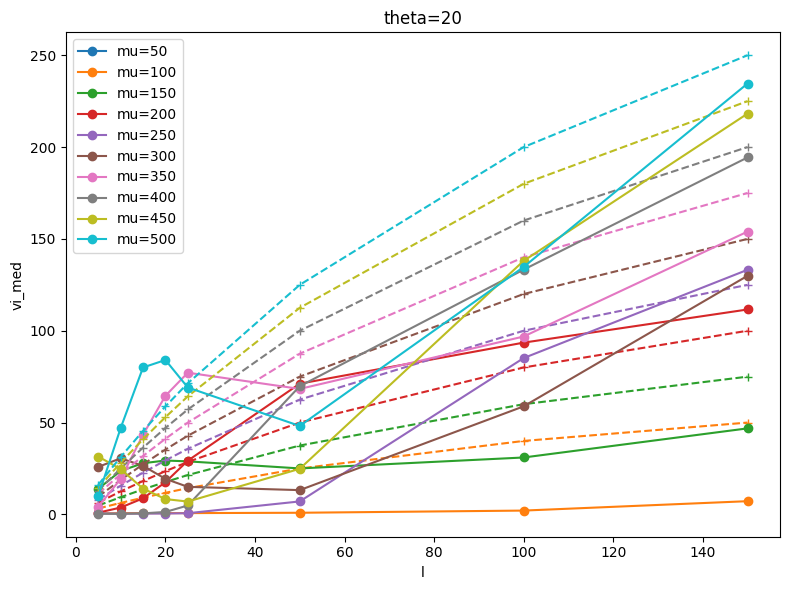

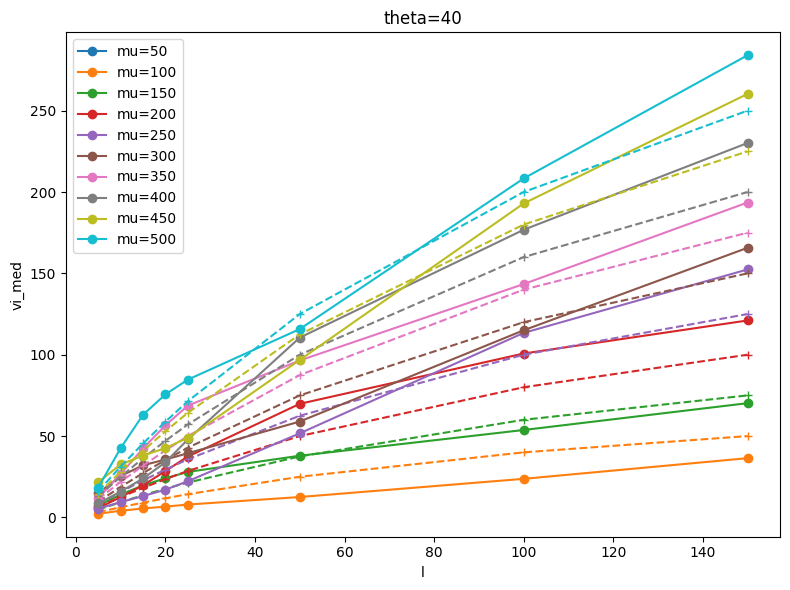

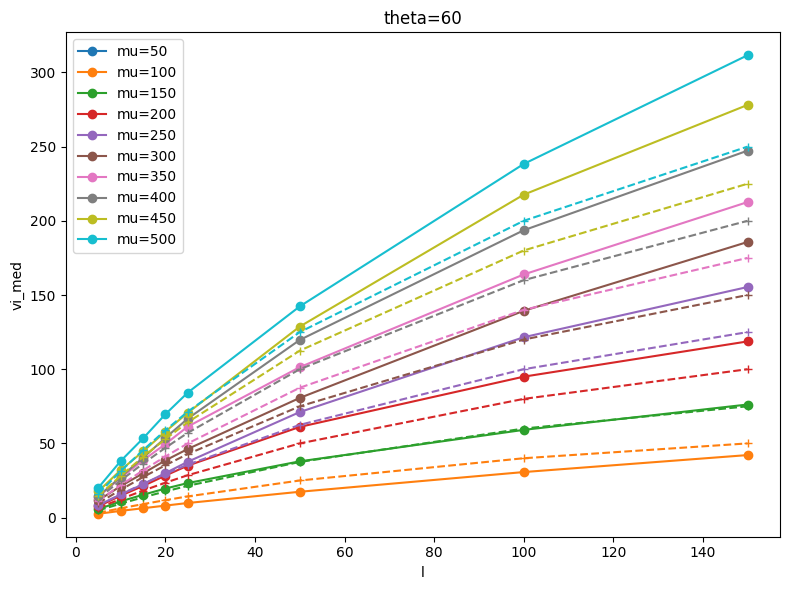

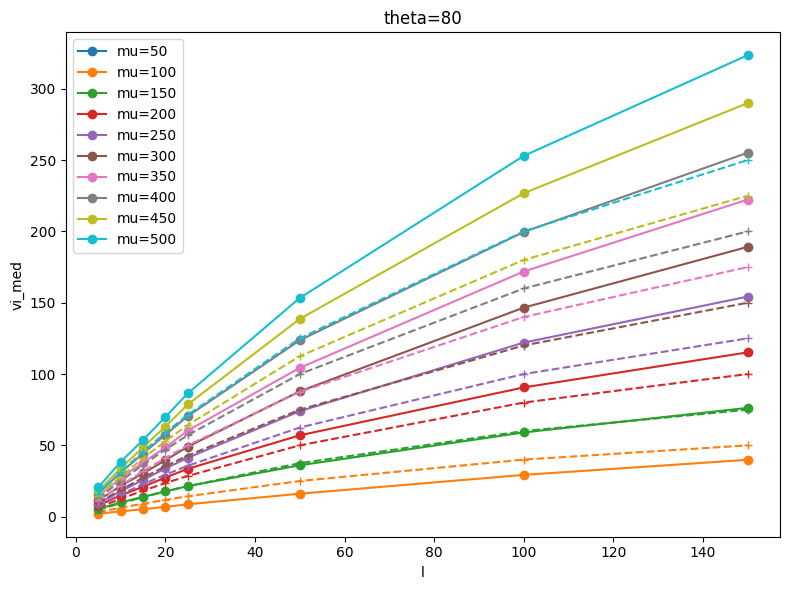

In [ ]:


# --- File --- #

root_scenario = Path.home() / "Documents" / "PhD" / "Workspace" / "nucleo" / "outputs" / "2025-01-01_PSMN" / "scenarios.json"
df_scenarios = pl.read_json(root_scenario)
# print(df_scenarios)


# --- Functions --- #

def generating_filter_on_df(df: pl.DataFrame, alpha_choice: str, bpmin: int) -> pl.DataFrame:
    df_filtered = df.filter((pl.col("alpha_choice") == alpha_choice) & (pl.col("bpmin") == bpmin))
    return(df_filtered)

df_filter = generating_filter_on_df(df_scenarios, alpha_choice="nt_random", bpmin=0)
# print(df_filter)


def filtering_df_on_scenarios(df: pl.DataFrame, df_filter: pl.DataFrame) -> pl.DataFrame:
    df_filtered = df.join(
        df_filter,
        on=["s", "l", "bpmin", "alpha_choice"],
        how="inner"
    )
    return df_filtered

df_brut = filtering_df_on_scenarios(df_main, df_filter)
print(df_brut)


def filtering_df_on_probas(df: pl.DataFrame, mu: int, theta: int) -> pl.DataFrame:
    df_filtered = df.filter((pl.col("mu") == mu) & (pl.col("theta") == theta))
    x = df_filtered["l"].to_numpy()
    y = df_filtered["vi_med"].to_numpy()
    return sort_by_x(x, y)


def sort_by_x(x: np.ndarray, y: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    idx = np.argsort(x)
    x_sorted = x[idx]
    y_sorted = y[idx]
    return x_sorted, y_sorted


# --- Result --- #

mus = np.arange(50,550,50)
colors = plt.cm.get_cmap('tab10', len(mus))(range(len(mus)))

def plot_speed_one_theta(theta):

    plt.figure(figsize=(8,6))
    s = 150

    for (mu, color) in zip(mus, colors):
        x, y = filtering_df_on_probas(df_brut, mu, theta)
        y_theory = mu * x / (s + x)
        plt.plot(x, y, label=f"mu={mu}", ls="-", c=color, marker='o')
        plt.plot(x, y_theory, ls="--", c=color, marker='+')

    plt.title(f"theta={theta}")
    plt.xlabel("l")
    plt.ylabel("vi_med")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
plot_speed_one_theta(20)
plot_speed_one_theta(40)
plot_speed_one_theta(60)
plot_speed_one_theta(80)

# TESTS

In [7]:
import polars as pl

def cut_single_proba(
    df: pl.DataFrame,
    s: int,
    l: int,
    bpmin: int,
    alpha_choice: str,
    proba_name: str,
    proba_value: int
) -> pl.DataFrame:
    """
    Filter a Polars DataFrame to extract a subset of simulations
    for a specific configuration and probability parameter.

    Parameters
    ----------
    df : pl.DataFrame
        The input Polars DataFrame containing simulation results.
    s : int
        Value of the `s` parameter to filter on.
    l : int
        Value of the `l` parameter to filter on.
    bpmin : int
        Value of the `bpmin` parameter to filter on.
    alpha_choice : str
        Value of the `alpha_choice` parameter to filter on.
    proba_value : int or float
        Value of the probability parameter (`mu` or `theta`) to filter on.
    proba_name : str, default="mu"
        Which probability parameter to filter on. Must be `"mu"` or `"theta"`.

    Returns
    -------
    pl.DataFrame
        A filtered Polars DataFrame containing only rows matching
        the provided configuration and probability parameter.
    """

    # Mask for simulation configuration
    mask_config = (
        (df["s"] == s)
        & (df["l"] == l)
        & (df["bpmin"] == bpmin)
        & (df["alpha_choice"] == alpha_choice)
    )

    # Mask for probability parameter
    if proba_name == "mu":
        mask_probas = df["mu"] == proba_value
    elif proba_name == "theta":
        mask_probas = df["theta"] == proba_value
    else:
        raise ValueError(f"Invalid proba_name '{proba_name}'. Must be 'mu' or 'theta'.")

    # Combine and filter
    return df.filter(mask_config & mask_probas)

In [ ]:
def ncl_cut_1D(df: pl.DataFrame, config: dict, output: str, fx_name: str, fx_value: float, norm_type=None, plot_log2=False) -> tuple[list, list]:
    
    # Proper call of function
    if output not in ["v_mean", "vi_med", "vi_mp", "vf", "wf"]:
        raise ValueError(f"Invalid speed_col: '{output}'")
    if fx_name not in ["mu", "theta"]:
        raise ValueError(f"Invalid fixed_input: '{fx_name}'")
    if norm_type not in ["raw", "norm_mu", "norm_th"]:
        raise ValueError(f"Invalid norm_type: '{norm_type}'")

    # Filtering data corresponding to configuration
    filters = (
        (pl.col("s") == config["s"]) &
        (pl.col("l") == config["l"]) &
        (pl.col("bpmin") == config["bpmin"]) &
        (pl.col("alpha_choice") == config["alpha_choice"])
    )

    # Fixed and non-fixed parameters
    if fx_name == "theta":
        mv_name = "mu"
    else: 
        mv_name = "theta"

    # Getting datas
    df_filtered = df.filter(filters & (pl.col(fx_name) == fx_value))
    x_values = df_filtered[mv_name].to_numpy()
    y_values = df_filtered[output].to_numpy()
    mu_values = df_filtered["mu"].to_numpy()

    # Test
    mu_min = 100
    mu_max = 250
    df_test = df.filter(filters & (pl.col("mu") > mu_min) & (pl.col("mu") < mu_max))
    row_vi_med_max = df_test.filter(pl.col("vi_med") == pl.max("vi_med")) # Max de vi_med pas de vi_med sur mu
    idx_max = row_vi_med_max["mu"].to_numpy()
    print(row_vi_med_max)
    
    # Du coup, le fix parameters ou du moins sa valeur est issue de idx_max : on selectionne la colonne de la heatmap mu = 160
    # On extraie les valeurs telles que mu = 160 pour tous les theta
    # Et ensuite, on conserve ce max, que l'on plot pour chaque configuration aléatoire de (s,l) et on  a notre graph pour observer si rescue ou pas

    # Normalizations
    if norm_type:
        if norm_type == "norm_mu":
            norm = mu_values
        if norm_type == "norm_th":
            alpha_o = df_filtered['alphao'][0]
            alpha_f = df_filtered['alphaf'][0]
            s = df_filtered['s'][0]
            l = df_filtered['l'][0]
            norm = (alpha_o * s + alpha_f * l) / (s + l) * mu_values

    # Normalizing or not
    if output in {'v_mean', 'vi_med', 'vi_mp', 'vf'}:
        y_values = np.array(y_values) / norm
    elif output in {'Cf', 'wf'}:
        pass

    # Getting datas in log2 or not
    if plot_log2:
        y_values = np.log2(np.clip(y_values, 1e-10, None))
    else : 
        y_values = np.array(y_values)

    # Done
    return x_values, y_values


def short_cfg_line(cfg):
    get = lambda k: (cfg[k].item() if hasattr(cfg[k], "item") else cfg[k])
    return f"{get('alpha_choice')} - s={get('s')} - l={get('l')} - bpmin={get('bpmin')}"


# Parameters
cfg = df_scenarios[3]
output = "vi_med"
fx_name = "theta"
fx_value = 50
print(f"Working on: {cfg} \nWith: output={output} - fx_name={fx_name} - fx_value={fx_value}")


# Call
x_plot, y_plot = ncl_cut_1D(
    df=work_df,
    config=cfg,
    output=output,
    fx_name=fx_name,
    fx_value=fx_value,
    norm_type="norm_th",
    plot_log2=False,
)


# Plot
plt.figure(figsize=(8, 6))
short_cfg = short_cfg_line(cfg)
mv_name = "mu" if fx_name == "theta" else "theta"
plt.title(f"{output} vs {mv_name} | {fx_name}={fx_value}")
plt.scatter(x_plot, y_plot, marker="o", label=f"{short_cfg}")
plt.xlabel(mv_name)
plt.ylabel(output + (" (log2)" if False else ""))
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'df_scenarios' is not defined

Courbe de valeur maximale de (vi_med / mu) en fonction du point le plus chaud en suivant les configs en fait

Donc c'est extraire le point maximal pour chaque config 

Puis tracer ce point maximal en fonction de la config et donc de la taille du linker

Attention perte de periodicité au fur et à mesure

Necessite une detection automatique du point le plus chaud : récupérer son mu_value

shape: (1, 27)
┌──────────────┬─────┬─────┬───────┬───┬────────┬────────────┬───────────┬───────┐
│ alpha_choice ┆ s   ┆ l   ┆ bpmin ┆ … ┆ wf_std ┆ vi_mean    ┆ vi_med    ┆ vi_mp │
│ ---          ┆ --- ┆ --- ┆ ---   ┆   ┆ ---    ┆ ---        ┆ ---       ┆ ---   │
│ str          ┆ i64 ┆ i64 ┆ i64   ┆   ┆ f64    ┆ f64        ┆ f64       ┆ f64   │
╞══════════════╪═════╪═════╪═══════╪═══╪════════╪════════════╪═══════════╪═══════╡
│ nt_random    ┆ 150 ┆ 5   ┆ 0     ┆ … ┆ 0.001  ┆ 630.167885 ┆ 52.527642 ┆ 0.5   │
└──────────────┴─────┴─────┴───────┴───┴────────┴────────────┴───────────┴───────┘


IndexError: index 0 is out of bounds for sequence of length 0

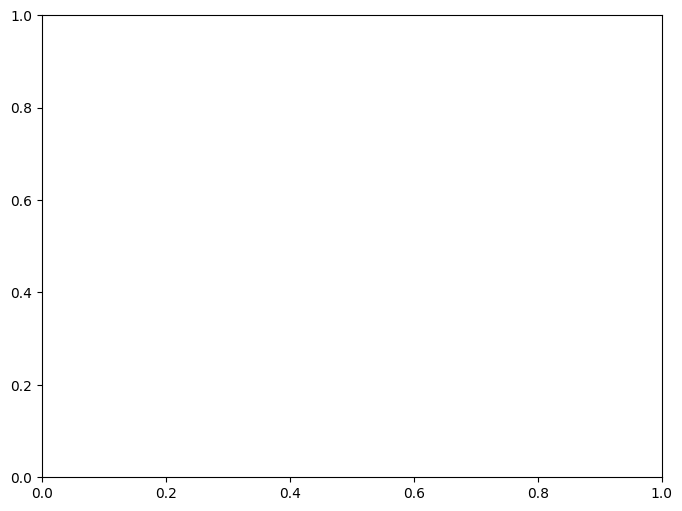

In [73]:
import matplotlib.pyplot as plt
import numpy as np

def plot_configs(
    df,
    scenarios,
    idxs,
    *,
    output="vi_med",
    fx_name="mu",
    norm_type="norm_mu",
    fx_value="s+l",          # "s+l" (par défaut) • scalaire • dict {idx: val} • callable(cfg)->val
    label_fn=None,           # par défaut: short_cfg_line(cfg)
    marker="o",
    alpha=0.75,
    ax=None,
):
    """
    Trace y(output) vs variable mobile pour plusieurs configs (scenarios[idxs]).
    - Fixe l'autre variable via fx_name/fx_value.
    - Réutilise ncl_cut_1D(df, cfg, output, fx_name, fx_val, norm_type).

    fx_value:
      - "s+l" (défaut) : utilise s+ l de la config
      - scalaire (int/float) : même valeur pour toutes les configs
      - dict {idx: val} : valeur par index de scenario
      - callable(cfg) -> val : fonction qui calcule la valeur à fixer
    """
    def _scalar(v):
        return v.item() if hasattr(v, "item") else v

    def _resolve_fx(cfg, i):
        if callable(fx_value):
            return fx_value(cfg)
        if isinstance(fx_value, dict):
            return fx_value[i]
        if isinstance(fx_value, (int, float)):
            return fx_value
        if fx_value == "s+l":
            return _scalar(cfg["s"]) + _scalar(cfg["l"])
        raise ValueError("fx_value doit être 's+l', un scalaire, un dict ou un callable(cfg).")

    mv_name = "mu" if fx_name == "theta" else "theta"
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    for i in idxs:
        cfg = scenarios[i]
        fx_val = _resolve_fx(cfg, i)
        x, y = ncl_cut_1D(df, cfg, output, fx_name, fx_val, norm_type=norm_type, plot_log2=False)
        if x.size == 0:
            continue
        lab = (label_fn(cfg) if label_fn else short_cfg_line(cfg)) + f" | {fx_name}={fx_val}"
        ax.scatter(x, y, marker=marker, alpha=alpha, label=lab)

    ax.set_title(f"{output} vs {mv_name} | norm={norm_type or 'raw'}")
    ax.set_xlabel(mv_name)
    ax.set_ylabel(output)
    ax.grid(True, which="both")
    ax.legend()
    plt.tight_layout()
    return ax


plot_configs(work_df, df_scenarios, [2,3,4,5,6],
             output="vi_med", fx_name="theta", norm_type="norm_th", fx_value=180)
plt.show()

# MORE TESTS

In [74]:
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
import os


plt.rcParams['font.size'] = 16


def sinusoid(t, A, omega, phi):
    return A * np.sin(omega * t + phi)

working_path = Path.home() / "Documents" / "PhD" / "Workspace" / "nucleo" / "outputs" / "ncl_test_0"
os.chdir(working_path)

df_work = pl.DataFrame()
df_work = pl.concat([pl.read_parquet(file) for file in working_path.rglob("*.parquet") if file.is_file()])
# print(df_work)

all_peaks = []


plt.figure(figsize=(8,6))
for row in df_work.iter_rows(named=True):

    # Extracting datas
    l = row["l"]
    s = row["s"]
    alphaf = row["alphaf"]
    alphao = row["alphao"]
    link_view = row["link_view"]
    label = f"l={row['l']}"
    norm = (s * alphao + alphaf * l) / (s + l)
    data = np.divide(link_view, norm)

    # Calculating sinusoid factors
    x = np.arange(0, len(data), 1)
    popt, _ = curve_fit(sinusoid, x, data)
    A_fit, omega_fit, phi_fit = popt

    # Getting the local maximas
    peaks, _ = find_peaks(data, distance=100)
    all_peaks.append(peaks)
    
    # Plotting
    plt.plot(data, label=f"{label} : y = {A_fit:.2f} sin({omega_fit:.2f} x + {phi_fit:.2f})")
    plt.scatter(peaks, data[peaks], color="red", marker="x")

    
plt.xlim([0, 3000])
plt.ylim([0, 10])
plt.xlabel("position in bp")
plt.ylabel("phase count")
plt.legend()
plt.show()


plt.figure(figsize=(8,6))
for i in range(0, len(all_peaks)):
    plt.plot(np.arange(0,10), all_peaks[i][0:10], label=f"{i}", marker="o")
plt.xlabel("peak count")
plt.ylabel("peak position")
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/ncl_test_0'

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import polars as pl
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Définir le modèle sinusoidal
def sinusoid(t, A, omega, phi):
    return A * np.sin(omega * t + phi)

# Chargement des données
working_path = Path.home() / "Documents" / "PhD" / "Workspace" / "nucleo" / "outputs" / "ncl_test_0"
os.chdir(working_path)
df_work = pl.concat([pl.read_parquet(file) for file in working_path.rglob("*.parquet") if file.is_file()])

all_peaks = []

# Création de la figure principale
fig, ax = plt.subplots(figsize=(8,6))  # 🔧 Figure + Axes

for row in df_work.iter_rows(named=True):

    l = row["l"]
    s = row["s"]
    alphaf = row["alphaf"]
    alphao = row["alphao"]
    link_view = row["link_view"]
    label = f"l={l}"
    norm = (s * alphao + alphaf * l) / (s + l)
    data = np.divide(link_view, norm)

    x = np.arange(0, len(data), 1)
    popt, _ = curve_fit(sinusoid, x, data)
    A_fit, omega_fit, phi_fit = popt

    peaks, _ = find_peaks(data, distance=100)
    all_peaks.append(peaks)
    
    ax.plot(data, label=f"{label} : y = {A_fit:.2f} sin({omega_fit:.2f} x + {phi_fit:.2f})")
    # ax.scatter(peaks, data[peaks], color="red", marker="x")

# Légendes principales
ax.set_xlim([0, 3000])
ax.set_ylim([0, 10])
ax.set_xlabel("position in bp")
ax.set_ylabel("phase count")
ax.legend(loc="upper left", fontsize=8)

# 🔍 Inset plot : zoom sur un pic
ax_inset = inset_axes(ax, width="50%", height="50%", loc="upper right", borderpad=2)

# Exemple : zoomer sur la première courbe si elle existe
if len(all_peaks) > 0:
    for i in range(0, len(all_peaks)):
        ax_inset.plot(np.arange(0,10), all_peaks[i][0:10], label=f"{i}", marker="o")
        ax_inset.set_xlabel("peak count")
        ax_inset.set_ylabel("peak position")
        # ax_inset.set_xticks([])
        # ax_inset.set_yticks([])
        ax_inset.legend(fontsize=8)

# plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/ncl_test_0'

# .